In [3]:
%pylab inline
#%load_ext sympy.interactive.ipythonprinting
from sympy import init_printing

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


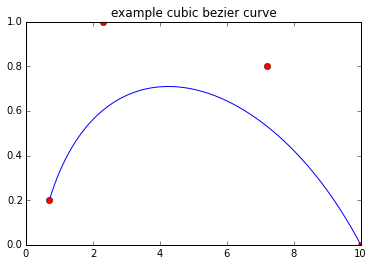

In [4]:
def numerical_cubic_bezier_fn(control_pts, t):
    """ 
    Numerically calculate an x,y point for the bezier curve at position t. 

    Parameters: control_pts -- list of 4 (x,y) control points
                t -- 'time' value should be between 0 and 1

    Return: (xpt, ypt) -- tuple of x,y data on the curve
    """
    check = ((0 <= t) and (t <= 1))
    assert check
    # define the actual cubic bezier equation here
    fn = lambda c,t : c[0]*(1 - t)**3 + c[1]*3*t*(1 - t)**2 + c[2]*3*t**2*(1 - t) + c[3]*t**3
    xs = [x for x,y in control_pts]
    ys = [y for x,y in control_pts]
    # now calculate the x,y position from the bezier equation
    xpt = fn(xs, t)
    ypt = fn(ys, t)
    return xpt, ypt

# just to make sure that I understand, lets create a list of numbers for a specific bezier curve
# arbitrarily define my 4 control points here
p0 = (0.7,0.2); p1 = (2.3,1.0); p2 = (7.2,0.8); p3 = (10.0,0.0)
# create a list of 1000 x,y points that traces over the length of this curve
points = [numerical_cubic_bezier_fn(control_pts=[p0,p1,p2,p3], t=t) for t in arange(0.0,1.0,1./1000)]
# separate the x's and y's so matplotlib can plot them
xs = [x for x,y in points]
ys = [y for x,y in points]

# plot the resulting curve and the control points
plot(xs, ys, 'b-')
hold(True)
for pt in [p0,p1,p2,p3]:
    plot( pt[0], pt[1], 'ro')
hold(False)
t=title('example cubic bezier curve')
#legend(['curve','control pts'])

In [1]:
from sympy.printing.mathml import mathml
from sympy import Symbol, Matrix, summation, diff, expand, collect, preview, Sum, latex, Eq, factor

t = Symbol('t_i')
c0, c1, c2, c3 = [Symbol(name) for name in ['c0','c1','c2','c3']]

# the equation for a cubic bezier path b(t) over t in [0,1]
# Note: the c control points are (x,y) tuples, but we're going to compute
# the resulting x and y values independantly. x and y are independant of
# each other, but both are dependant on t which goes from 0 to 1
symbolic_cubic_bezier_fn = c0*(1 - t)**3 + c1*3*t*(1 - t)**2 + c2*3*t**2*(1 - t) + c3*t**3
print 'The cubic bezier function B(t) is:'
B = Symbol('B(t_i)')
Eq(B, symbolic_cubic_bezier_fn)

The cubic bezier function B(t) is:


B(t_i) == c0*(-t_i + 1)**3 + 3*c1*t_i*(-t_i + 1)**2 + 3*c2*t_i**2*(-t_i + 1) + c3*t_i**3